**Today concept**
* Applying Linear Regression for 
   1. Prediction of Salary of employee with Experience
   2. Prediction of Revenue of Reliance industries with Jio Subscribers


**Linear Regression**

Linear regression is a example of Linear model

Linear model is a **sum of weighted variables that predicts the target value for given input data**

![linear](8_simpleLinear.png)

**Line equation  y = mx +c**

y target/dependent 

x independed variable/feature

m co-efficient
c intercept or constant

1. Positive linear relation
    * if temperature increases sales of the cooldrinks increase
    * if health of person increases then his life also increase
2. Negative linear relation
    * if the lock down period increases then country GDP decreases
    * polution increases then life of humans decrease
    

**Apply linear regression for Salary prediction**

**1. Get the data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**2.pre-processing**

**is there any missing values?**

In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**is there any invalid values?**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 520.0 bytes


**Algorithm Training**

**How to select the algorithm?**

based on target

Here target salary is continuous value we select regression related algorithms

**To visualize and understand is there any linearity between feature and target**

In [7]:
import matplotlib.pyplot as plt

In [9]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

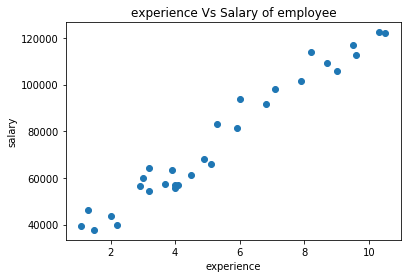

In [11]:
plt.figure()

plt.scatter(df['YearsExperience'],  df['Salary'])
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('experience Vs Salary of employee')
plt.show()

**we have to import linear regression algorithm**

In [15]:
from sklearn.linear_model import LinearRegression

**we have to create object for the algorithm**

In [16]:
model = LinearRegression()

**we have to separate dataset as features and target**

in machine learning terminology
feature represented in X(upper case x)
target represented in y (lower case y)

In [17]:
X = df[['YearsExperience']]
y = df['Salary']

In [25]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

**we train the model with data**

model.fit(features_df,target_series)

In [21]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**we have to test the model**

how much salary i may expect for 12 years of experience?

In [26]:
model.predict( [ [12]   ]  )

array([139191.74805613])

**How much salary for 12 years and 7 years experience**

In [27]:
model.predict( [ [12] ,[ 5]   ]   )

array([139191.74805613,  73042.01180594])

**test the model with score**

model.score(features,target)

In [28]:
model.score(X,y) * 100 

95.69566641435084

**metrics for evaluating algorithm**

In [29]:
from sklearn.metrics import r2_score

**r2_score(y_true_or_actual_values,y_predected)**

In [32]:
r2_score(y,  model.predict(X) )* 100

95.69566641435085

**Improve the model**

1. combining the different features
2. training the model with more examples/data
3. parameter turning

### prediction of revenue of reliance industries with jio subscribers

**1. Get the data**

In [35]:
import pandas as pd

In [40]:
df = pd.read_csv('Reliance.csv')

In [41]:
df

,Jio,Revenue
0,160.1,8136
1,186.6,8421
2,215.3,10023
3,252.3,11416
4,280.1,12893
5,306.7,14328
6,331.3,15741
7,355.2,16534
8,370.0,17555
9,387.5,18632


**How many rows and columns in dataframe**

In [42]:
df.shape

(10, 2)

**Pre-processs the data**

In [43]:
df.isna().sum()

Jio        0
Revenue    0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Jio        10 non-null float64
Revenue    10 non-null int64
dtypes: float64(1), int64(1)
memory usage: 200.0 bytes


**Train the model**

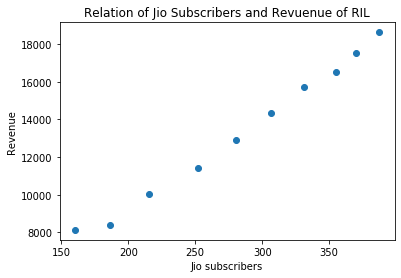

In [45]:
plt.figure()
plt.scatter(df['Jio'],  df['Revenue'])
plt.xlabel('Jio subscribers')
plt.ylabel('Revenue')
plt.title('Relation of Jio Subscribers and Revuenue of RIL')
plt.show()

In [46]:
X = df[['Jio']]
y = df['Revenue']

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**How much revenue we can expect when jio subscribers have 400**

In [50]:
model.predict([[ 400 ]])

array([18861.7845469])

**test the model**

In [52]:
model.score(X,y) * 100

99.20788182785108

**we can see coefficient and constant**

In [53]:
model.coef_

array([47.57021861])

In [54]:
model.intercept_

-166.30289581554825

**visualize the actual data and predicted line**

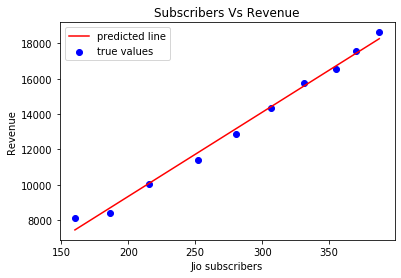

In [61]:
plt.figure()
plt.scatter(X , y,c='blue',label="true values")
plt.plot(X,  model.predict(X) ,c='red',label='predicted line')
plt.xlabel('Jio subscribers')
plt.ylabel('Revenue')
plt.title('Subscribers Vs Revenue')
plt.legend()
plt.show()